In [ ]:
#!cat /proc/meminfo

In [1]:
import sys
sys.version

%matplotlib inline

In [2]:
!pip3 install fastai==2.0

     |████████████████████████████████| 358kB 15.7MB/s 
     |████████████████████████████████| 61kB 9.0MB/s 
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [3]:
#from fastai.vision.all import *
import fastai
print(fastai.__version__) 

2.0.0


In [4]:
!pip3 install nbdev
!pip3 install fastai==2.0.19 fastcore==1.3.2


     |████████████████████████████████| 51kB 6.1MB/s 
     |████████████████████████████████| 61kB 8.5MB/s 
     |████████████████████████████████| 194kB 15.3MB/s 
     |████████████████████████████████| 51kB 7.4MB/s 
     |████████████████████████████████| 5.9MB 20.0MB/s 
     |████████████████████████████████| 748.8MB 22kB/s 
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.6.0 which is incompatible.
ERROR: nbdev 1.1.14 has requirement fastcore>=1.3.19, but you'll have fastcore 1.3.2 which is incompatible.
ERROR: fastrelease 0.1.11 has requirement fastcore>=1.3.13, but you'll have fastcore 1.3.2 which is incompatible.
  Found existing installation: torch 1.8.1+cu101
    Uninstalling torch-1.8.1+cu101:
      Successfully uninstalled torch-1.8.1+cu101
  Found existing installation: torchvision 0.9.1+cu101
    Uninstalling torchvision-0.9.1+cu101:
      Successfully uninstalled torchvision-0.9.1+cu101
  Found existing installation: fastcore 1.3.20
    Uninsta

In [1]:
from fastai.vision.all import *
from nbdev.showdoc import *


In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


#FOLDERNAME = 'cs231n/project/UHManoa100/train/Acalypha_hispida'
FOLDERNAME = 'cs231n/project/UHManoa100'
assert FOLDERNAME is not None, "[!] Enter the foldername."

# Now that we've mounted your Drive, this ensures that
# the Python interpreter of the Colab VM can load
# python files from within it.
import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

Mounted at /content/drive


In [3]:
bs = 64

In [4]:
p = '/content/drive/MyDrive/{}'.format(FOLDERNAME)
print(p)
from pathlib import Path
str_path = p
path = Path(str_path)
fnames = get_image_files(p)
len(fnames)

/content/drive/MyDrive/cs231n/project/UHManoa100


47818

In [5]:
#dls = ImageDataLoaders.from_name_re(
#    path, fnames, pat=r'(.+)\([0-9]+\)_\d+.jpg$', item_tfms=Resize(460), bs=bs,
#    batch_tfms=[*aug_transforms(size=224, min_scale=0.75), Normalize.from_stats(*imagenet_stats)])

data = ImageDataLoaders.from_folder(path, train='train', valid_pct=.2, bs=bs)

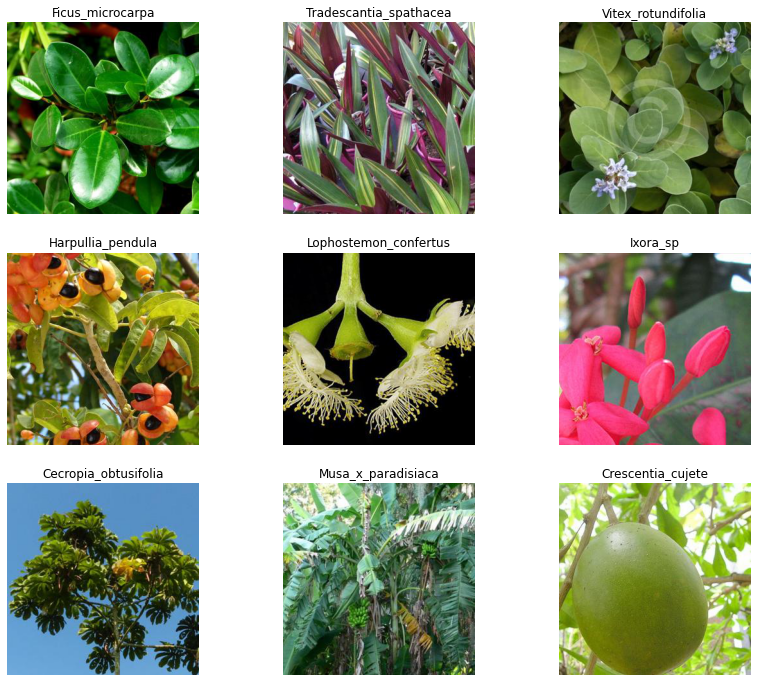

In [6]:
#dls.show_batch(max_n=9, figsize=(7,6))
data.show_batch(max_n=9, figsize=(14,12))

In [7]:
print(data.vocab)
len(data.vocab),data.c

['Acacia_confusa', 'Acalypha_hispida', 'Alocasia_macrorrhiza', 'Aloe_vera', 'Alpinia_purpurata', 'Anthurium_andreanum', 'Azadirachta_indica', 'Bauhinia_variegata', 'Bixa_orellana', 'Blighia_sapida', 'Bombax_glabra', 'Bougainvillea_sp', 'Brugmansia_x_candida', 'Caesalpinia_pulcherrima', 'Calotropis_gigantea', 'Canna_indica', 'Cardamine_flexuosa', 'Cardiospermum_grandiflorum', 'Cascabela_thevetia', 'Cassia_bakeriana', 'Casuarina_equisetifolia', 'Catharanthus_roseus', 'Cattleya_sp', 'Cecropia_obtusifolia', 'Chlorophytum_comosum', 'Clerodendrum_quadriloculare', 'Clitoria_ternatea', 'Cocos_nucifera', 'Codiaeum_variegatum', 'Couroupita_guianensis', 'Crescentia_cujete', 'Crinum_asiaticum', 'Cupressus_sempervirens', 'Cyperus_papyrus', 'Delonix_regia', 'Dendrobium_sp', 'Dichorisandra_thyrsiflora', 'Eichhornia_crassipes', 'Elaeocarpus_grandis', 'Erythrina_crista-galli', 'Eucalyptus_deglupta', 'Eugenia_uniflora', 'Ficus_microcarpa', 'Filicium_decipiens', 'Gardenia_brighamii', 'Gomphrena_globosa',

(101, 101)

In [8]:

learn = cnn_learner(data, resnet34, metrics=[accuracy,error_rate]).to_fp16()

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [9]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [10]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,error_rate,time


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.848750,1.101485,0.748405,0.251595,1:33:49
1,0.914118,0.472005,0.882464,0.117536,01:59
2,0.576312,0.269488,0.935167,0.064833,01:59
3,0.467737,0.238766,0.942068,0.057932,02:00


In [11]:
learn.save('finetune-1')

Path('/content/drive/MyDrive/cs231n/project/UHManoa100/models/finetune-1.pth')

In [ ]:
#loading the saved model
model_path = "/content/drive/MyDrive/cs231n/project/UHManoa100/models/finetune-1"

learn.load(model_path)

In [12]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

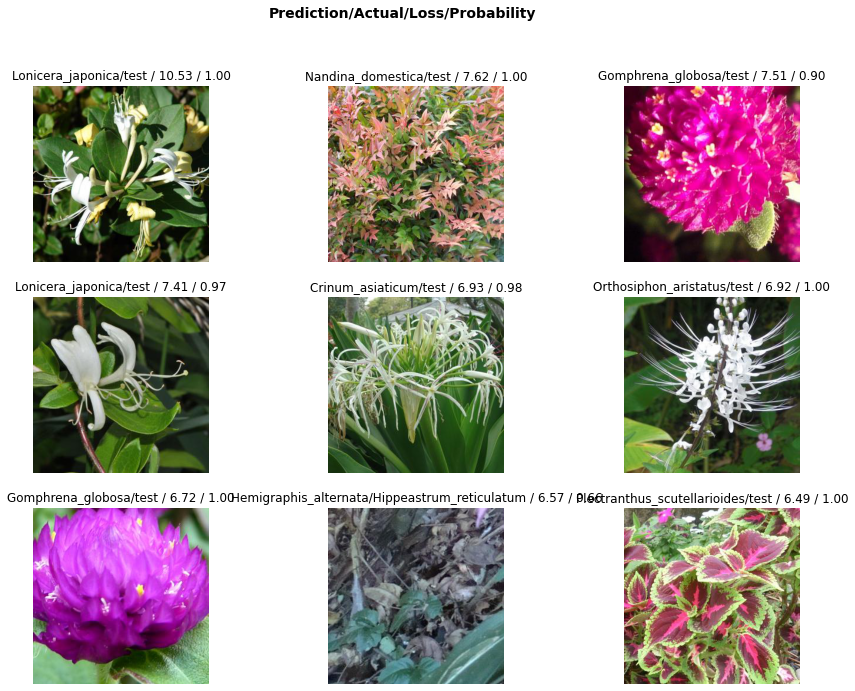

In [13]:
interp.plot_top_losses(9, figsize=(15,11))

In [14]:
doc(interp.plot_top_losses)

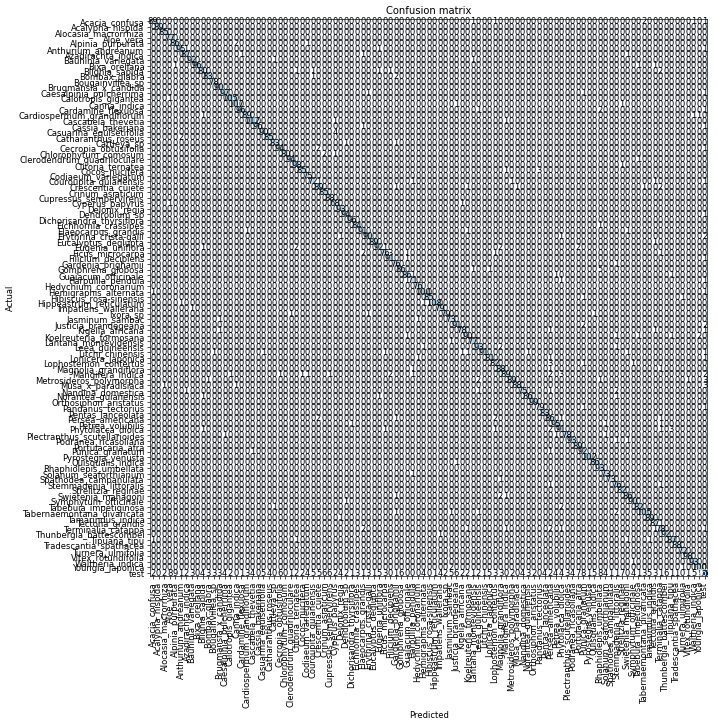

In [15]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [16]:

interp.most_confused(min_val=2)

[('test', 'Alpinia_purpurata', 9),
 ('test', 'Aloe_vera', 8),
 ('test', 'Punica_granatum', 8),
 ('test', 'Rhaphiolepis_umbellata', 8),
 ('test', 'Portulacaria_afra', 7),
 ('test', 'Strelitzia_reginae', 7),
 ('test', 'Cecropia_obtusifolia', 6),
 ('test', 'Crinum_asiaticum', 6),
 ('test', 'Cupressus_sempervirens', 6),
 ('test', 'Gomphrena_globosa', 6),
 ('test', 'Justicia_brandegeana', 6),
 ('test', 'Thunbergia_battescombei', 6),
 ('Gomphrena_globosa', 'Rhaphiolepis_umbellata', 5),
 ('test', 'Casuarina_equisetifolia', 5),
 ('test', 'Couroupita_guianensis', 5),
 ('test', 'Crescentia_cujete', 5),
 ('test', 'Eugenia_uniflora', 5),
 ('test', 'Jasminum_sambac', 5),
 ('test', 'Lonicera_japonica', 5),
 ('test', 'Quisqualis_indica', 5),
 ('test', 'Tamarindus_indica', 5),
 ('test', 'Waltheria_indica', 5),
 ('Casuarina_equisetifolia', 'Cyperus_papyrus', 4),
 ('test', 'Blighia_sapida', 4),
 ('test', 'Caesalpinia_pulcherrima', 4),
 ('test', 'Cascabela_thevetia', 4),
 ('test', 'Catharanthus_roseus', 

In [17]:

learn.unfreeze()

In [18]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.814874,0.448021,0.888842,0.111158,02:15


In [19]:
learn.load('finetune-1');

SuggestedLRs(lr_min=1.0964781722577755e-07, lr_steep=7.585775847473997e-07)

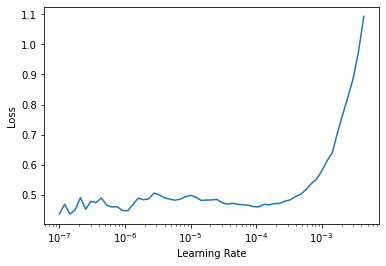

In [20]:

learn.lr_find()

In [21]:
learn.unfreeze()
learn.fit_one_cycle(2, lr_max=slice(1e-6,1e-4))


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.391790,0.160553,0.963087,0.036913,02:08
1,0.284579,0.133102,0.969466,0.030534,02:08
